In [1]:
import pandas as pd
import numpy as np
import time
import normet
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig

In [2]:
df=pd.read_csv(r'data/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [8]:
automl=normet.train_model(df1a,variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

2024-07-10 15:06:12 : Training AutoML...
2024-07-10 15:07:40 : Best model is lgbm with best model parameters of {'n_estimators': 515, 'num_leaves': 21, 'min_child_samples': 13, 'learning_rate': 0.14027049292611726, 'log_max_bin': 9, 'colsample_bytree': 0.5618562156824052, 'reg_alpha': 6.241907638433782, 'reg_lambda': 0.024371156445369874}


In [9]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: lgbm
Best model parameters: {'n_estimators': 515, 'num_leaves': 21, 'min_child_samples': 13, 'learning_rate': 0.14027049292611726, 'log_max_bin': 9, 'colsample_bytree': 0.5618562156824052, 'reg_alpha': 6.241907638433782, 'reg_lambda': 0.024371156445369874}


In [10]:
automl.best_result

{'pred_time': 8.034855750814143e-06,
 'wall_clock_time': 86.790109872818,
 'metric_for_logging': {'pred_time': 8.034855750814143e-06},
 'val_loss': 0.14396498735254404,
 'training_iteration': 1,
 'config': {'n_estimators': 515,
  'num_leaves': 21,
  'min_child_samples': 13,
  'learning_rate': 0.14027049292611726,
  'log_max_bin': 9,
  'colsample_bytree': 0.5618562156824052,
  'reg_alpha': 6.241907638433782,
  'reg_lambda': 0.024371156445369874},
 'config/n_estimators': 515,
 'config/num_leaves': 21,
 'config/min_child_samples': 13,
 'config/learning_rate': 0.14027049292611726,
 'config/log_max_bin': 9,
 'config/colsample_bytree': 0.5618562156824052,
 'config/reg_alpha': 6.241907638433782,
 'config/reg_lambda': 0.024371156445369874,
 'experiment_tag': 'exp',
 'time_total_s': 4.931412935256958}

In [11]:
automl.feature_importances_

array([276, 957, 964, 800, 797, 937, 979, 641, 773, 466, 802, 914, 408,
       586], dtype=int32)

In [12]:
automl.feature_names_in_

['weekday',
 'u10',
 'v10',
 'd2m',
 't2m',
 'blh',
 'sp',
 'ssrd',
 'tcc',
 'tp',
 'rh2m',
 'date_unix',
 'day_julian',
 'hour']

In [13]:
mod_stats=(pd.concat([normet.modStats(df1a,automl,set='testing'),
                normet.modStats(df1a,automl,set='training'),
                normet.modStats(df1a.assign(set="all"),automl,set='all')]))

In [14]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.903327,0.125228,2.053401,0.013612,0.223197,2.899264,0.931136,***,0.626013,0.813006,0.867014,testing
0,4780,0.971548,-0.000332,0.716696,-0.000036,0.078651,0.935661,0.993694,***,0.869089,0.934544,0.987428,training
0,6373,0.954496,0.031053,1.050820,0.003400,0.115042,1.660643,0.979195,***,0.808220,0.904110,0.958824,all


In [15]:
df1a

,rowid,tcc,v10,d2m,ssrd,rh2m,blh,u10,sp,tp,value,t2m,date,date_unix,day_julian,weekday,hour,set
0,0,0.650958,1.545010,277.183465,-1.164153e-10,91.884130,384.209053,-2.720528,102252.303312,0.000008,58.1,278.394725,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,0.603699,1.282742,276.695430,-1.164153e-10,92.715877,353.220263,-2.308789,102211.168636,0.000002,43.2,277.772899,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,0.710378,0.758730,276.505662,-1.164153e-10,93.485560,255.911846,-2.216471,102174.855967,0.000005,43.0,277.463419,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,0.837765,0.509013,276.412816,-1.164153e-10,93.906363,191.375560,-1.928623,102166.786485,0.000005,42.8,277.305813,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,0.819103,0.607069,276.553051,-1.164153e-10,93.696878,151.780210,-1.700043,102142.578039,0.000003,36.8,277.478941,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,0.918149,-1.945195,272.197565,-5.820766e-11,90.582979,476.945688,1.380939,99902.506413,0.000000,11.7,273.557442,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,0.839639,-2.102732,272.171041,-5.820766e-11,89.939908,486.665851,0.987925,99947.625909,0.000000,11.0,273.629146,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,0.739354,-1.933668,272.087408,-5.820766e-11,90.422188,489.355002,0.681543,100000.215520,0.000000,15.3,273.470592,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,0.643753,-0.583816,272.235319,-5.820766e-11,95.088677,40.714872,1.020793,100042.844978,0.000000,17.1,272.926062,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [16]:
start_time = time.time()
df_dew=normet.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=1000,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-10 15:07:40 : Normalising the dataset using the trained model in parallel.
2024-07-10 15:08:14 : Aggregating 1000 predictions...
Execution time: 34.26 seconds


In [17]:
start_time = time.time()
df_dew1=normet.normalise(df1a, automl, weather_df=df1.loc['2020-01-01':'2020-04-01',:],
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-10 15:08:14 : Normalising the dataset using the trained model in parallel.
2024-07-10 15:08:22 : Aggregating 300 predictions...
Execution time: 7.82 seconds


In [18]:
weather_df=df1.reset_index().iloc[0:100][['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m']]

In [19]:
weather_df.head()

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m
0,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130
1,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877
2,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560
3,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363
4,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878


In [20]:
start_time = time.time()
df_dew2=normet.normalise(df1a, automl, weather_df=weather_df,
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-07-10 15:08:22 : Normalising the dataset using the trained model in parallel.
2024-07-10 15:08:29 : Aggregating 300 predictions...
Execution time: 6.85 seconds


<Axes: xlabel='date'>

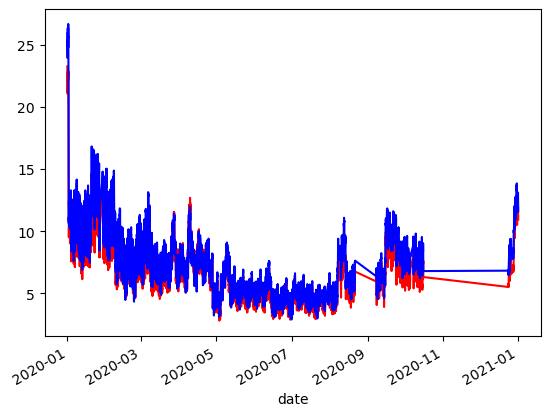

In [21]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')

In [22]:
model_config={
    'time_budget': 60,  # Total running time in seconds
    'metric': 'r2', #
}

In [23]:
df1a.columns

Index(['rowid', 'tcc', 'v10', 'd2m', 'ssrd', 'rh2m', 'blh', 'u10', 'sp', 'tp',
       'value', 't2m', 'date', 'date_unix', 'day_julian', 'weekday', 'hour',
       'set'],
      dtype='object')

In [24]:
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-10 15:08:29 : Training AutoML...
2024-07-10 15:09:30 : Best model is lgbm with best model parameters of {'n_estimators': 308, 'num_leaves': 38, 'min_child_samples': 8, 'learning_rate': 0.25630241340601634, 'log_max_bin': 8, 'colsample_bytree': 0.6884035737993074, 'reg_alpha': 10.880981358662433, 'reg_lambda': 0.2065849656583953}
2024-07-10 15:09:30 : Normalising the dataset using the trained model in parallel.
2024-07-10 15:09:32 : Aggregating 100 predictions...


In [25]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-07-10 15:09:32 : Normalising the dataset using the trained model in parallel.
2024-07-10 15:09:35 : Aggregating 100 predictions...


In [26]:
df_dew, mod_stats=normet.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],weather_df=weather_df,model_config=model_config,n_samples=100)

2024-07-10 15:09:35 : Normalising the dataset using the trained model in parallel.
2024-07-10 15:09:37 : Aggregating 100 predictions...


<Axes: xlabel='date'>

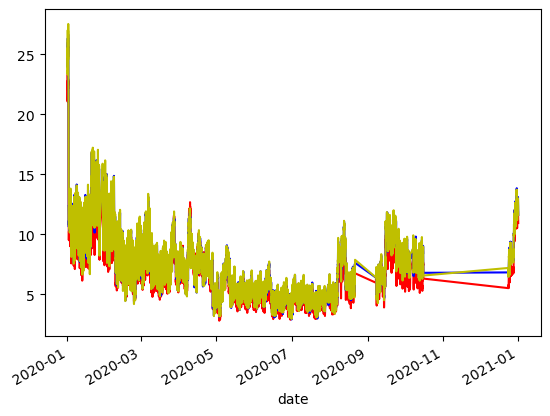

In [27]:
df_dew1['normalised'].plot(c='r')
df_dew2['normalised'].plot(c='b')
df_dew['normalised'].plot(c='y')

In [28]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.903327,0.125228,2.053401,0.013612,0.223197,2.899264,0.931136,***,0.626013,0.813006,0.867014,testing
1,4780,0.971548,-0.000332,0.716696,-0.000036,0.078651,0.935661,0.993694,***,0.869089,0.934544,0.987428,training
2,6373,0.954496,0.031053,1.050820,0.003400,0.115042,1.660643,0.979195,***,0.808220,0.904110,0.958824,all


In [29]:
df_dew, mod_stats=normet.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-07-10 15:11:10 : Progress: 20.00% (Model 1/5)... ETA: 6.14 minutes
2024-07-10 15:13:02 : Progress: 40.00% (Model 2/5)... ETA: 5.10 minutes
2024-07-10 15:14:27 : Progress: 60.00% (Model 3/5)... ETA: 3.22 minutes
2024-07-10 15:16:01 : Progress: 80.00% (Model 4/5)... ETA: 1.60 minutes
2024-07-10 15:17:40 : Progress: 100.00% (Model 5/5)... ETA: 0.00 seconds


In [30]:
#Resampling from given dataset
df_dew, mod_stats=normet.do_all(df1,value='PM2.5',weather_df=df1.loc['2020-01-01':'2020-04-01',:],feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=300)

2024-07-10 15:17:40 : Training AutoML...
2024-07-10 15:18:40 : Best model is lgbm with best model parameters of {'n_estimators': 308, 'num_leaves': 38, 'min_child_samples': 8, 'learning_rate': 0.25630241340601634, 'log_max_bin': 8, 'colsample_bytree': 0.6884035737993074, 'reg_alpha': 10.880981358662433, 'reg_lambda': 0.2065849656583953}
2024-07-10 15:18:40 : Normalising the dataset using the trained model in parallel.
2024-07-10 15:18:47 : Aggregating 300 predictions...


In [31]:
df_dew.head()

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,19.188764
2020-01-01 01:00:00,43.2,17.586228
2020-01-01 02:00:00,43.0,17.435849
2020-01-01 03:00:00,42.8,17.507566
2020-01-01 04:00:00,36.8,17.558268


# Time series decomposition

In [32]:
df_dewca, mod_stats=normet.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-07-10 15:18:47 : Training AutoML...
2024-07-10 15:20:15 : Best model is lgbm with best model parameters of {'n_estimators': 308, 'num_leaves': 38, 'min_child_samples': 8, 'learning_rate': 0.25630241340601634, 'log_max_bin': 8, 'colsample_bytree': 0.6884035737993074, 'reg_alpha': 10.880981358662433, 'reg_lambda': 0.2065849656583953}
2024-07-10 15:20:15 : Subtracting base...
2024-07-10 15:20:22 : Subtracting date_unix... ETA: 26.36 seconds
2024-07-10 15:20:28 : Subtracting day_julian... ETA: 19.84 seconds
2024-07-10 15:20:35 : Subtracting weekday... ETA: 13.27 seconds
2024-07-10 15:20:41 : Subtracting hour... ETA: 6.61 seconds


In [33]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.611419,18.237761,1.134274,0.707503,-0.055862,20.461201,0.437525
2020-01-01 01:00:00,43.2,9.376669,18.485646,1.178451,0.710586,-0.454976,20.122483,0.202776
2020-01-01 02:00:00,43.0,9.236267,18.340612,1.192082,0.738223,-0.500053,19.833239,0.062374
2020-01-01 03:00:00,42.8,9.259233,18.368717,0.806198,0.656962,-0.688039,19.229178,0.085340
2020-01-01 04:00:00,36.8,8.915594,17.965451,1.182367,0.688868,-0.079445,19.498941,-0.258299
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.865350,10.219289,2.548230,-0.281162,0.055476,12.233289,-0.308543
2020-12-31 20:00:00,11.0,8.690037,10.386399,2.700194,-0.313468,0.013997,12.303265,-0.483856
2020-12-31 21:00:00,15.3,8.494820,10.704357,2.532368,-0.335345,-0.282722,11.939585,-0.679073


In [34]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-10 15:20:48 : Subtracting base...
2024-07-10 15:20:57 : Subtracting date_unix... ETA: 35.47 seconds
2024-07-10 15:21:05 : Subtracting day_julian... ETA: 25.91 seconds
2024-07-10 15:21:14 : Subtracting weekday... ETA: 16.99 seconds
2024-07-10 15:21:22 : Subtracting hour... ETA: 8.38 seconds


In [35]:
df_dewcb, mod_stats=normet.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-07-10 15:21:30 : Training AutoML...
2024-07-10 15:23:01 : Best model is lgbm with best model parameters of {'n_estimators': 308, 'num_leaves': 38, 'min_child_samples': 8, 'learning_rate': 0.25630241340601634, 'log_max_bin': 8, 'colsample_bytree': 0.6884035737993074, 'reg_alpha': 10.880981358662433, 'reg_lambda': 0.2065849656583953}
2024-07-10 15:23:01 : Subtracting deweathered...
2024-07-10 15:23:08 : Subtracting v10... ETA: 1.07 minutes
2024-07-10 15:23:14 : Subtracting u10... ETA: 57.62 seconds
2024-07-10 15:23:20 : Subtracting sp... ETA: 50.95 seconds
2024-07-10 15:23:26 : Subtracting blh... ETA: 44.24 seconds
2024-07-10 15:23:33 : Subtracting rh2m... ETA: 37.72 seconds
2024-07-10 15:23:39 : Subtracting d2m... ETA: 31.29 seconds
2024-07-10 15:23:45 : Subtracting tcc... ETA: 24.88 seconds
2024-07-10 15:23:51 : Subtracting t2m... ETA: 18.55 seconds
2024-07-10 15:23:56 : Subtracting ssrd... ETA: 12.25 seconds
2024-07-10 15:24:02 : Subtracting tp... ETA: 6.08 seconds


In [36]:
df_dewcb, mod_stats=normet.decom_met(df1a, model=automl, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321)

2024-07-10 15:24:08 : Subtracting deweathered...
2024-07-10 15:24:16 : Subtracting sp... ETA: 1.37 minutes
2024-07-10 15:24:24 : Subtracting v10... ETA: 1.22 minutes
2024-07-10 15:24:32 : Subtracting u10... ETA: 1.07 minutes
2024-07-10 15:24:39 : Subtracting blh... ETA: 55.60 seconds
2024-07-10 15:24:47 : Subtracting rh2m... ETA: 47.22 seconds
2024-07-10 15:24:55 : Subtracting d2m... ETA: 39.15 seconds
2024-07-10 15:25:02 : Subtracting t2m... ETA: 31.01 seconds
2024-07-10 15:25:09 : Subtracting tcc... ETA: 23.02 seconds
2024-07-10 15:25:16 : Subtracting ssrd... ETA: 15.19 seconds
2024-07-10 15:25:23 : Subtracting tp... ETA: 7.52 seconds


In [37]:
df_dewcb

,observed,deweathered,sp,v10,u10,blh,rh2m,d2m,t2m,tcc,ssrd,tp,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,26.242295,0.826493,3.686003,11.383313,10.645870,5.641988,4.501195,4.732893,4.835804,1.484197,3.276893,4.911941
2020-01-01 01:00:00,43.2,26.034693,0.373012,2.653402,9.618851,8.918127,3.253159,2.441120,3.490243,2.848234,0.188228,1.463933,-1.159509
2020-01-01 02:00:00,43.0,25.007765,0.452762,2.484581,8.903190,8.970495,3.301974,0.598083,2.718499,4.089272,0.860056,2.142075,-0.292270
2020-01-01 03:00:00,42.8,24.701097,0.357774,2.596141,8.592086,9.686619,3.446703,-1.086510,1.805874,4.799868,2.096966,1.889411,0.213374
2020-01-01 04:00:00,36.8,24.144976,0.467432,2.456280,6.039048,3.746467,-0.224463,-1.165327,1.465390,4.028879,1.601291,0.540158,3.048566
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,12.817211,0.410439,0.487893,-0.004290,-0.235985,-0.016914,0.291075,1.050871,-0.047214,-1.848680,-0.819285,-0.793695
2020-12-31 20:00:00,11.0,12.419172,0.509601,0.458382,-0.017177,-0.094501,-0.085232,0.063760,0.932324,-0.217719,-1.602282,-0.458494,-1.170600
2020-12-31 21:00:00,15.3,12.074267,0.373424,0.460319,0.158517,-0.055789,-0.090265,0.760373,1.138733,0.271482,-0.806679,-0.505199,2.294549


In [38]:
df_dewca, mod_stats=normet.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-07-10 15:25:30 : Subtracting base...
2024-07-10 15:25:38 : Subtracting date_unix... ETA: 33.81 seconds
2024-07-10 15:25:46 : Subtracting day_julian... ETA: 25.06 seconds
2024-07-10 15:25:55 : Subtracting weekday... ETA: 16.55 seconds
2024-07-10 15:26:03 : Subtracting hour... ETA: 8.21 seconds


In [39]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.649207,14.729374,8.021796,2.322409,0.689805,26.242295,0.478910
2020-01-01 01:00:00,43.2,9.426950,14.889167,8.121692,2.280711,0.486472,26.034693,0.256653
2020-01-01 02:00:00,43.0,9.136490,14.751031,7.915418,2.378531,-0.003409,25.007765,-0.033808
2020-01-01 03:00:00,42.8,9.309728,14.631519,8.139859,2.081581,-0.291292,24.701097,0.139430
2020-01-01 04:00:00,36.8,8.907476,14.636762,7.939014,2.235332,-0.403310,24.144976,-0.262822
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,8.926148,12.198699,0.860837,-0.144903,0.146727,12.817211,-0.244149
2020-12-31 20:00:00,11.0,8.624976,12.134630,0.997562,-0.127334,-0.040365,12.419172,-0.545321
2020-12-31 21:00:00,15.3,8.422218,12.331029,1.000948,-0.071205,-0.438426,12.074267,-0.748079


# Rolling weather normalisation

In [40]:
df_dewc1, mod_stats=normet.rolling_dew(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-07-10 15:26:12 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-10 15:26:20 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 22.94 seconds
2024-07-10 15:26:28 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 15.33 seconds
2024-07-10 15:26:35 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 7.12 seconds


In [41]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_29,rolling_30,rolling_31,rolling_32,rolling_33,rolling_34,rolling_35,rolling_36,rolling_37,rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,20.869450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,20.986381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,19.356464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,21.141964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,19.531956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

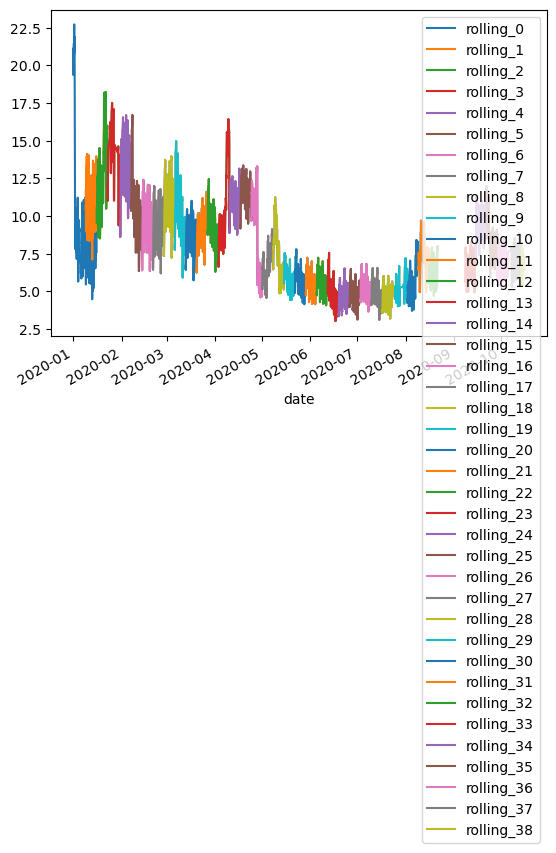

In [42]:
df_dewc1.iloc[:,1:].plot()

In [43]:
df_dewc2, mod_stats=normet.rolling_met(df1a, automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321)

2024-07-10 15:26:45 : Rolling window 0 from 2020-01-01 to 2020-01-15
2024-07-10 15:26:52 : Rolling window 10 from 2020-03-13 to 2020-03-27 ETA: 20.00 seconds
2024-07-10 15:27:01 : Rolling window 20 from 2020-05-22 to 2020-06-05 ETA: 14.97 seconds
2024-07-10 15:27:09 : Rolling window 30 from 2020-08-02 to 2020-08-16 ETA: 7.24 seconds


In [44]:
df_dewc2.head()

,observed,normalised,emi_mean_14,emi_std_14,met_short,met_season
date,,,,,,
2020-01-01 00:00:00,58.1,26.012991,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,25.260102,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,25.166088,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,25.626553,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,23.681240,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

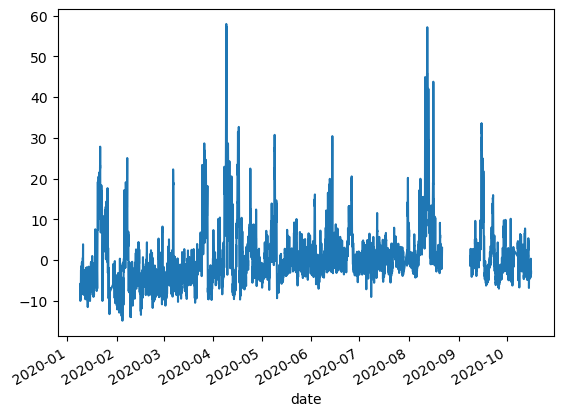

In [45]:
df_dewc2['met_short'].plot()

<Axes: xlabel='date'>

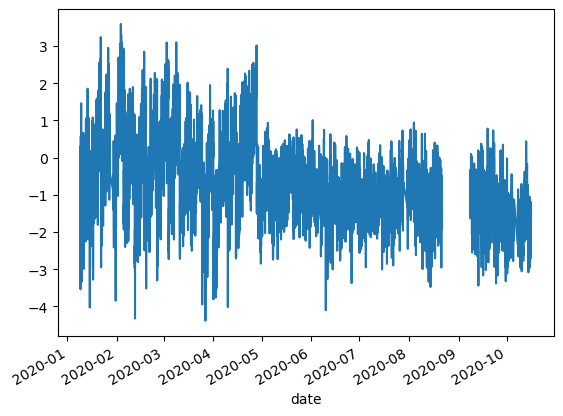

In [46]:
df_dewc2['met_season'].plot()

# Partial Dependence Plots

In [47]:
df1a=normet.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [48]:
df1a

,rowid,tcc,v10,d2m,ssrd,rh2m,blh,u10,sp,tp,value,t2m,date,date_unix,day_julian,weekday,hour,set
0,0,0.650958,1.545010,277.183465,-1.164153e-10,91.884130,384.209053,-2.720528,102252.303312,0.000008,58.1,278.394725,2020-01-01 00:00:00,1.577837e+09,1,3,0,training
1,1,0.603699,1.282742,276.695430,-1.164153e-10,92.715877,353.220263,-2.308789,102211.168636,0.000002,43.2,277.772899,2020-01-01 01:00:00,1.577840e+09,1,3,1,training
2,2,0.710378,0.758730,276.505662,-1.164153e-10,93.485560,255.911846,-2.216471,102174.855967,0.000005,43.0,277.463419,2020-01-01 02:00:00,1.577844e+09,1,3,2,testing
3,3,0.837765,0.509013,276.412816,-1.164153e-10,93.906363,191.375560,-1.928623,102166.786485,0.000005,42.8,277.305813,2020-01-01 03:00:00,1.577848e+09,1,3,3,training
4,4,0.819103,0.607069,276.553051,-1.164153e-10,93.696878,151.780210,-1.700043,102142.578039,0.000003,36.8,277.478941,2020-01-01 04:00:00,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,0.918149,-1.945195,272.197565,-5.820766e-11,90.582979,476.945688,1.380939,99902.506413,0.000000,11.7,273.557442,2020-12-31 19:00:00,1.609441e+09,366,4,19,training
6369,6369,0.839639,-2.102732,272.171041,-5.820766e-11,89.939908,486.665851,0.987925,99947.625909,0.000000,11.0,273.629146,2020-12-31 20:00:00,1.609445e+09,366,4,20,training
6370,6370,0.739354,-1.933668,272.087408,-5.820766e-11,90.422188,489.355002,0.681543,100000.215520,0.000000,15.3,273.470592,2020-12-31 21:00:00,1.609448e+09,366,4,21,testing
6371,6371,0.643753,-0.583816,272.235319,-5.820766e-11,95.088677,40.714872,1.020793,100042.844978,0.000000,17.1,272.926062,2020-12-31 22:00:00,1.609452e+09,366,4,22,training


In [50]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp(automl,df1a,feature_names=all_features, variables=['blh'])

In [51]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,blh,73.415911,15.737425,8.867199
1,blh,88.917320,15.264048,8.949218
2,blh,104.418730,14.954979,8.955473
3,blh,119.920140,15.204826,8.502816
4,blh,135.421549,13.739481,7.792907
...,...,...,...,...
95,blh,1546.049822,6.931434,5.074614
96,blh,1561.551231,6.934838,5.076320
97,blh,1577.052641,6.934058,5.076403
98,blh,1592.554051,7.014429,5.075442


In [52]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp(automl,df1a,feature_names=all_features, variables=['blh','t2m'])

In [53]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,blh,73.415911,15.737425,8.867199
1,blh,88.917320,15.264048,8.949218
2,blh,104.418730,14.954979,8.955473
3,blh,119.920140,15.204826,8.502816
4,blh,135.421549,13.739481,7.792907
...,...,...,...,...
195,t2m,294.518468,10.476466,7.613353
196,t2m,294.715875,10.472642,7.610621
197,t2m,294.913281,10.474860,7.610967
198,t2m,295.110688,10.472865,7.610880


In [54]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=normet.pdp(automl,df1a,feature_names=all_features)

In [55]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,11.534881,8.352826
1,u10,-4.242993,11.581436,8.358594
2,u10,-4.131954,11.531110,8.356416
3,u10,-4.020915,11.512272,8.356733
4,u10,-3.909875,11.883776,8.348761
...,...,...,...,...
1226,hour,19.000000,9.699442,7.449359
1227,hour,20.000000,9.617872,7.432539
1228,hour,21.000000,9.249729,7.444976
1229,hour,22.000000,9.081541,7.438713
